In [41]:
import json 
import numpy as np
from glob import glob
import re
import math
import matplotlib.pyplot as plt


In [65]:
exp1_data_dir = '../exp_data/final/exp1_2/'
exp1_data_files = glob(exp1_data_dir + "*.json")
exp1_data = [-1 for _ in range(len(exp1_data_files))]

for data_f in exp1_data_files:
    with open(data_f) as df:
        trial_idx = int(re.search(r'_(\d+).json', data_f).groups()[0])-1
        exp1_data[trial_idx] =  json.load(df)

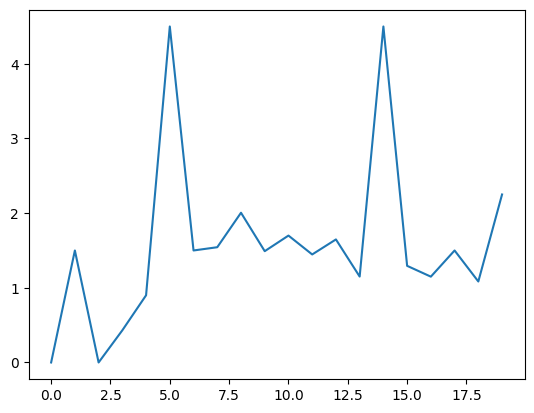

In [66]:
def running_average(seq, w):
    averaged_seq = []
    for i in range(len(seq)-w):
        averaged_seq.append(sum(seq[i:i+w]) / w)
    return averaged_seq
    
hyper_param_vals = []
trial_seqs = []
mean_convergence = []

for trial in exp1_data:
    trial_seqs.append(trial['score'])
    hyper_param_vals.append([trial['threshold'], trial['reward'], trial['penalty'], trial['explore_variance'], trial['refractory_step']])
    mean_convergence.append(sum(trial_seqs[-1][-5:])/len(trial_seqs[-1][-5:])) 

plt.plot((running_average(mean_convergence, 1)))

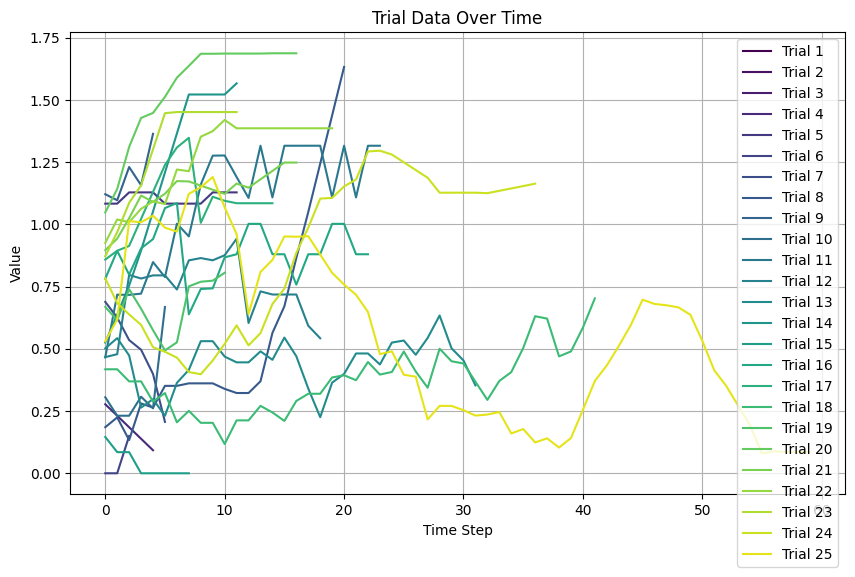

In [64]:
cmap = plt.cm.viridis
running_avg_seqs = [running_average(t, 10) for t in trial_seqs]

# Create a line plot
plt.figure(figsize=(10, 6))
for i, trial in enumerate(running_avg_seqs):
    color = cmap(float(i) / len(running_avg_seqs))
    plt.plot(trial, label=f'Trial {i+1}', color=color)
    
plt.title('Trial Data Over Time')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

['../exp_data/exp2/e2_20x20x20_trial_2.json', '../exp_data/exp2/e2_trial_1.json', '../exp_data/exp2/e2_20x20x20_trial_3.json', '../exp_data/exp2/e2_20x20x20_bg_trial_1.json', '../exp_data/exp2/e2_20x20x20_trial_4.json', '../exp_data/exp2/e2_20x20x20_trial_5.json', '../exp_data/exp2/e2_trial_4.json', '../exp_data/exp2/e2_20x20x20_bg_trial_3.json', '../exp_data/exp2/e2_20x20x20_trial_6.json', '../exp_data/exp2/e2_5x5x5_trial_1.json', '../exp_data/exp2/e2_20x20x20_bg_trial_2.json', '../exp_data/exp2/e2_trial_2.json', '../exp_data/exp2/e2_20x20x20_bg_trial_4.json', '../exp_data/exp2/e2_trial_3.json', '../exp_data/exp2/e2_20x20x20_trial_1.json']
26


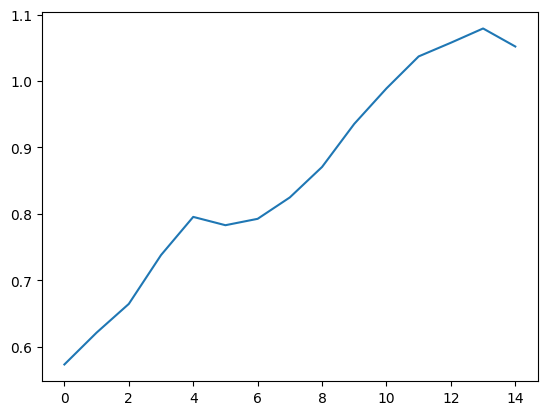

In [40]:
exp2_data_dir = '../exp_data/exp2/'
exp2_data_files = glob(exp2_data_dir + "*.json")
#Trials 3 and 4 were 8x8x8
print(exp2_data_files)
bg_exp2_file = '../exp_data/exp2/e2_20x20x20_bg_trial_4.json'
exp2_file = '../exp_data/exp3/e3_20x20x20_jitter_trial_34.json'

with open(exp2_file) as df:
    exp2_data = json.load(df)

with open(bg_exp2_file) as df:
    bg_exp2_data = json.load(df)


# plt.xlim(0,300)
print(len(get_odds_seq(exp2_data, 0.5)))

plt.plot((running_average(exp2_data['score'], 20)))
# plt.plot((running_average(get_odds_seq(bg_exp2_data, 0.5), 25)))